In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
dataset = pd.read_csv("/content/spam.csv", encoding='latin1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
dataset = dataset.rename(columns={'v1': 'Label', 'v2': 'Message'})
dataset['Label'] = dataset['Label'].map({'spam': 1, 'ham': 0})

In [19]:
tfidf_tool = TfidfVectorizer(stop_words="english")

In [20]:

features = tfidf_tool.fit_transform(dataset["Message"])
targets = dataset["Label"]

In [21]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    features, targets, test_size=0.2, random_state=42)

In [22]:
spam_detector = LogisticRegression(max_iter=2000, class_weight='balanced')
spam_detector.fit(X_train_new, y_train_new)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [23]:
y_pred_new = spam_detector.predict(X_test_new)

In [24]:
print("Model Accuracy:", accuracy_score(y_test_new, y_pred_new))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_new, y_pred_new))
print("\nDetailed Report:\n", classification_report(y_test_new, y_pred_new))

Model Accuracy: 0.9757847533632287

Confusion Matrix:
 [[956   9]
 [ 18 132]]

Detailed Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.94      0.88      0.91       150

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [28]:

incoming_texts = [
    "You have been selected for a free vacation trip!",
    "Let's catch up tomorrow morning.",
    "Claim your free mobile recharge instantly!",
    "Don't forget to finish the course project.",
    "You are the lucky winner of a ₹1,00,000 reward!"
]

In [29]:
test_vectors = tfidf_tool.transform(incoming_texts)
test_results = spam_detector.predict(test_vectors)

In [30]:
for sms, label in zip(incoming_texts, test_results):
    print("\nSMS:", sms)
    print("Result:", "SPAM" if label == 1 else "SAFE")


SMS: You have been selected for a free vacation trip!
Result: SPAM

SMS: Let's catch up tomorrow morning.
Result: SAFE

SMS: Claim your free mobile recharge instantly!
Result: SPAM

SMS: Don't forget to finish the course project.
Result: SAFE

SMS: You are the lucky winner of a ₹1,00,000 reward!
Result: SPAM


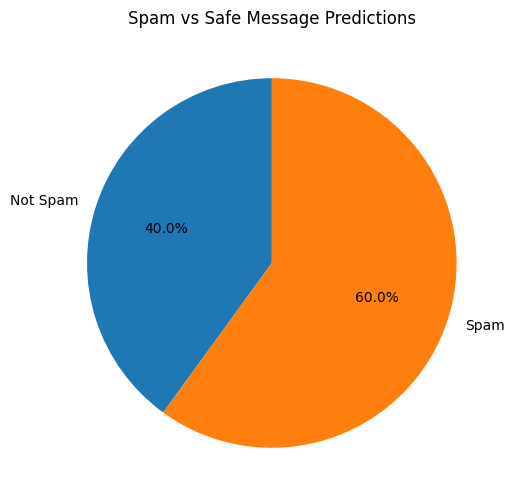

In [33]:
spam_count = sum(test_results)
safe_count = len(test_results) - spam_count

labels = ["Not Spam", "Spam"]
sizes = [safe_count, spam_count]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Spam vs Safe Message Predictions")
plt.show()